# Making plots for pragmatic vs. literal learner

- x axis: successive examples (3, then 2, then 1) 
- y axis: learner's belief over the true hypothesis $P(h|d)$
- Literal learner is after 0 iterations, pragmatic learner is after 500 iterations

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from make_df import make_df_from_spreadsheet
from rectangle_model import *

sns.set_style('white')
sns.set_context('talk')

In [2]:
# Import all problems from spreadsheet

filename = 'teaching_stimuli - all_examples.csv'
all_problems = make_df_from_spreadsheet(filename)

In [3]:
# Start with example 35

problem_35 = {}
problem_35[0] = find_teacher_probs(0, 35, all_problems)  # 0 iterations
problem_35[500] = find_teacher_probs(500, 35, all_problems)  # 500 iterations

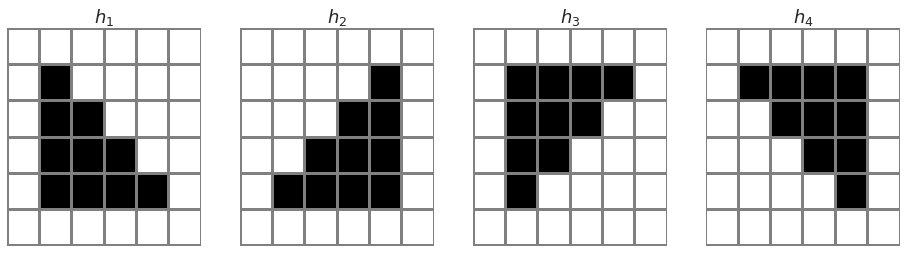

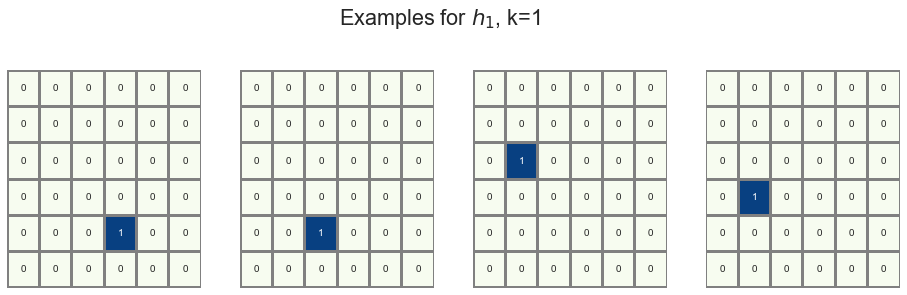

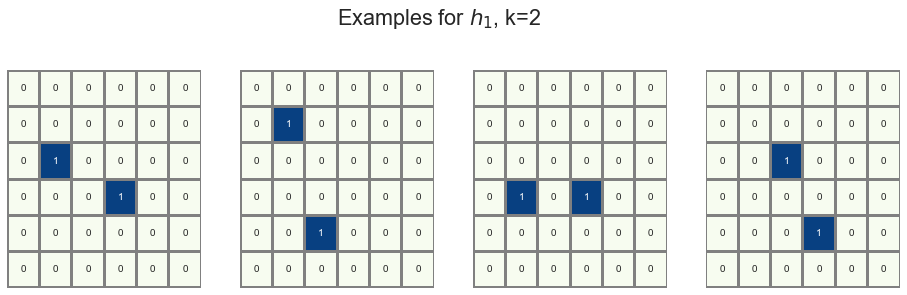

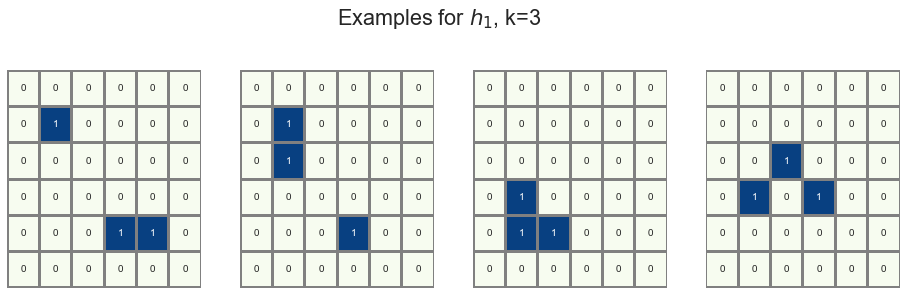

In [4]:
# View examples

plot_high_prob_examples(problem_35, 500, 'd', 35, all_problems)

In [5]:
# Select a specific set of examples

sort_values_ascending_by_column(problem_35[500][3]['h'], 'h_1').head(10)

h_1  h_2  h_3  h_4
i_1 i_2 i_3                    
7   27  28   1.0  0.0  0.0  0.0
    13  27   1.0  0.0  0.0  0.0
19  25  26   1.0  0.0  0.0  0.0
14  19  21   1.0  0.0  0.0  0.0
7   19  21   1.0  0.0  0.0  0.0
        26   1.0  0.0  0.0  0.0
        27   1.0  0.0  0.0  0.0
        28   1.0  0.0  0.0  0.0
    13  28   1.0  0.0  0.0  0.0
        26   1.0  0.0  0.0  0.0

In [6]:
sort_values_ascending_by_column(problem_35[0][3]['h'], 'h_1').head(10)

h_1  h_2  h_3  h_4
i_1 i_2 i_3                    
7   27  28   1.0  0.0  0.0  0.0
    13  27   1.0  0.0  0.0  0.0
19  25  26   1.0  0.0  0.0  0.0
14  19  21   1.0  0.0  0.0  0.0
7   19  21   1.0  0.0  0.0  0.0
        26   1.0  0.0  0.0  0.0
        27   1.0  0.0  0.0  0.0
        28   1.0  0.0  0.0  0.0
    13  28   1.0  0.0  0.0  0.0
        26   1.0  0.0  0.0  0.0

## Pragmatic example

In [7]:
problem_35[500][3]['h'].loc[(14,19,21), :]

h_1    1.0
h_2    0.0
h_3    0.0
h_4    0.0
Name: (14, 19, 21), dtype: float64

In [8]:
problem_35[500][2]['h'].loc[(14,19), :]

h_1    0.5
h_2    0.0
h_3    0.5
h_4    0.0
Name: (14, 19), dtype: float64

In [9]:
problem_35[500][1]['h'].loc[(14), :]

h_1    0.333333
h_2    0.000000
h_3    0.333333
h_4    0.333333
Name: 14, dtype: float64

In [10]:
problem_35[500][3]['h'].loc[(7,13,27), :]

h_1    1.0
h_2    0.0
h_3    0.0
h_4    0.0
Name: (7, 13, 27), dtype: float64

In [11]:
problem_35[500][2]['h'].loc[(7,13), :]

h_1    0.5
h_2    0.0
h_3    0.5
h_4    0.0
Name: (7, 13), dtype: float64

In [12]:
problem_35[500][1]['h'].loc[(7), :]

h_1    0.333333
h_2    0.000000
h_3    0.333333
h_4    0.333333
Name: 7, dtype: float64

## Literal example

In [13]:
problem_35[0][3]['h'].loc[(14,19,21), :]

h_1    1.0
h_2    0.0
h_3    0.0
h_4    0.0
Name: (14, 19, 21), dtype: float64

In [14]:
problem_35[0][2]['h'].loc[(14,19), :]

h_1    0.5
h_2    0.0
h_3    0.5
h_4    0.0
Name: (14, 19), dtype: float64

In [15]:
problem_35[0][1]['h'].loc[(14), :]

h_1    0.333333
h_2    0.000000
h_3    0.333333
h_4    0.333333
Name: 14, dtype: float64

In [16]:
problem_35[0][3]['h'].loc[(7,13,27), :]

h_1    1.0
h_2    0.0
h_3    0.0
h_4    0.0
Name: (7, 13, 27), dtype: float64

In [17]:
problem_35[0][2]['h'].loc[(7,13), :]

h_1    0.5
h_2    0.0
h_3    0.5
h_4    0.0
Name: (7, 13), dtype: float64

In [18]:
problem_35[0][1]['h'].loc[(7), :]

h_1    0.333333
h_2    0.000000
h_3    0.333333
h_4    0.333333
Name: 7, dtype: float64

In [19]:
from pandas._testing import assert_frame_equal
assert_frame_equal(problem_35[0][3]['h'], problem_35[500][3]['h'])
# Looks like pragmatic and literal learner are the same for problem 35?

## Problem 34

In [20]:
problem_34 = {}
problem_34[0] = find_teacher_probs(0, 34, all_problems)  # 0 iterations
problem_34[500] = find_teacher_probs(500, 34, all_problems)  # 500 iterations

In [21]:
#assert_frame_equal(problem_34[0][3]['h'], problem_34[500][3]['h'])
# Pragmatic and literal learner different for problem 35

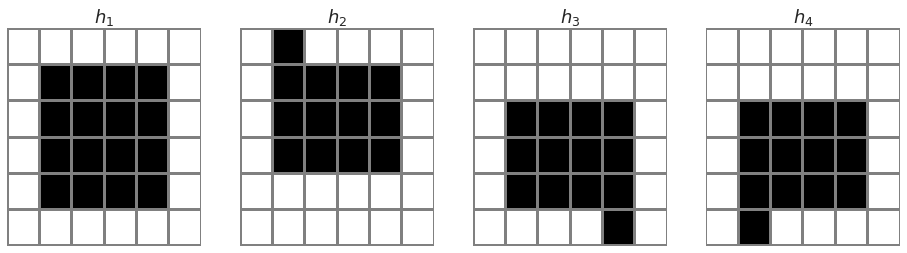

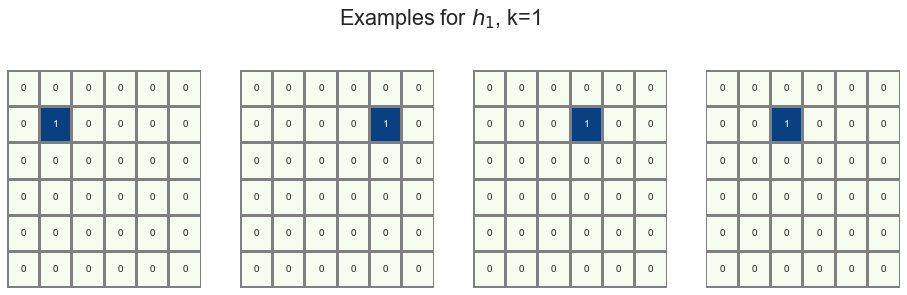

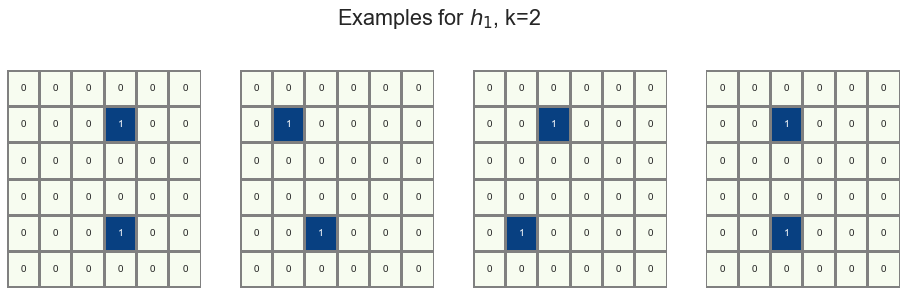

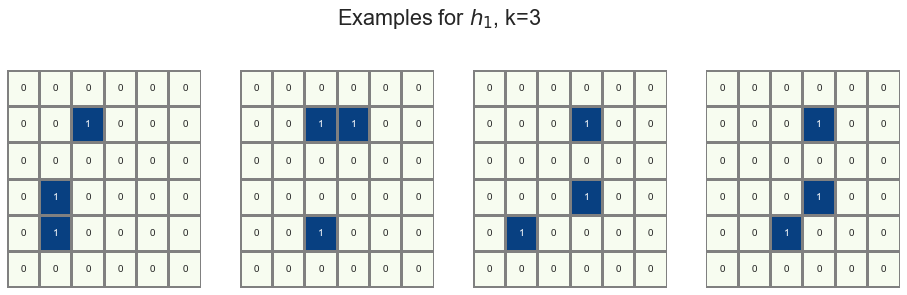

In [22]:
plot_high_prob_examples(problem_34, 500, 'd', 34, all_problems)

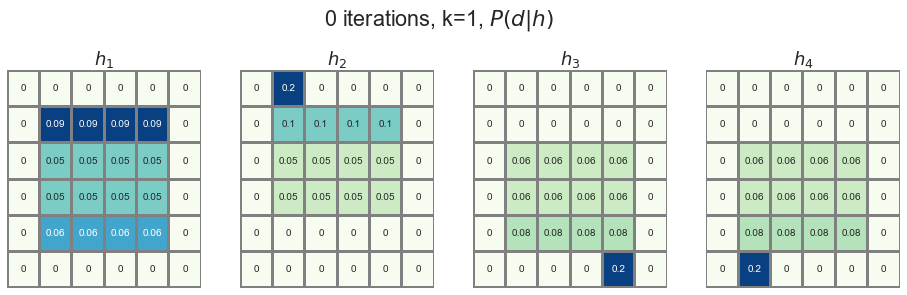

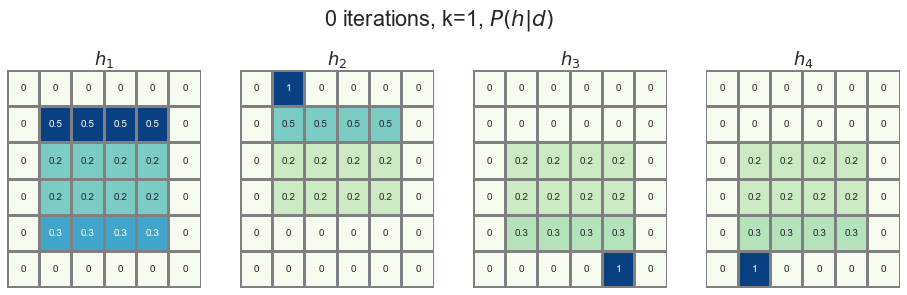

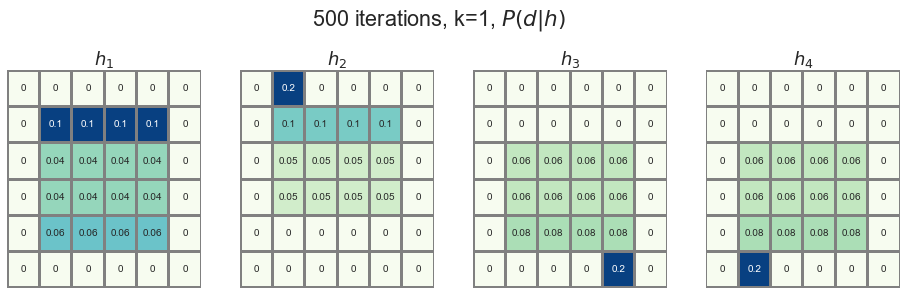

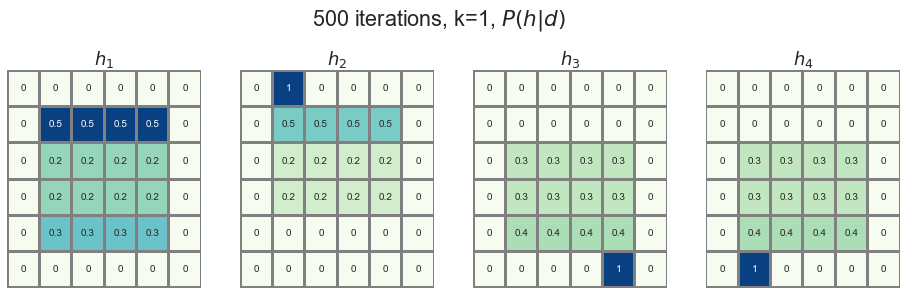

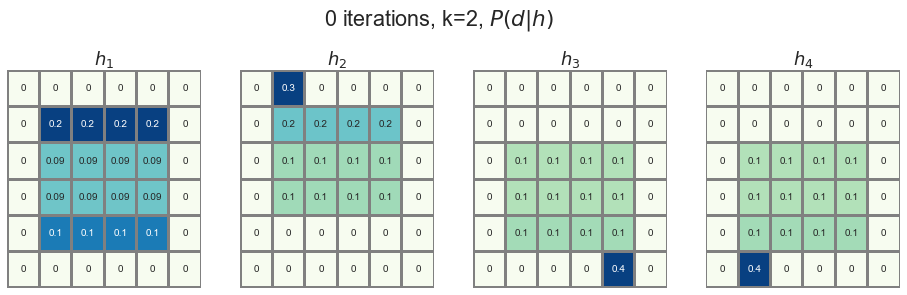

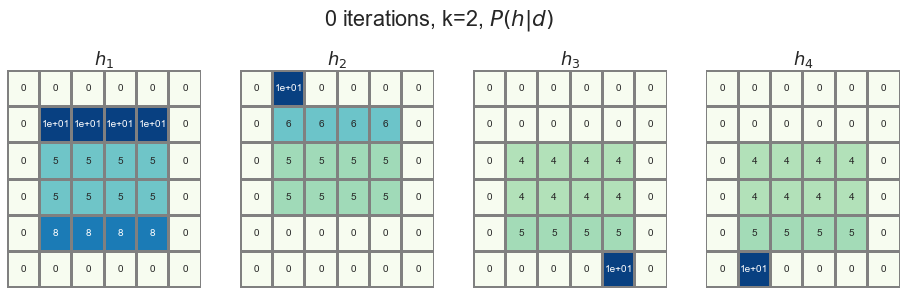

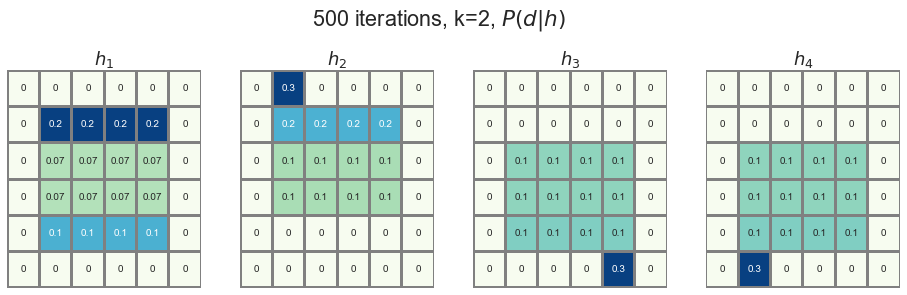

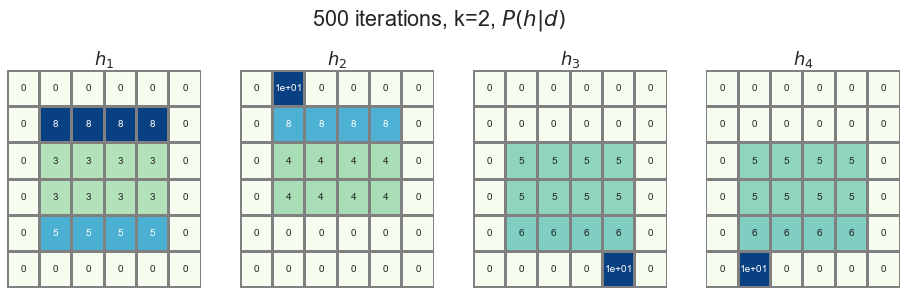

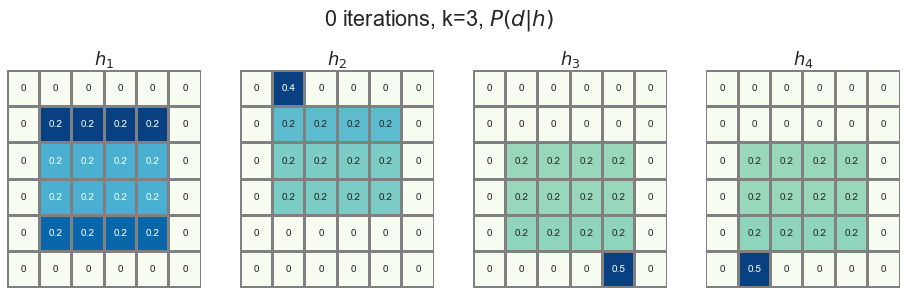

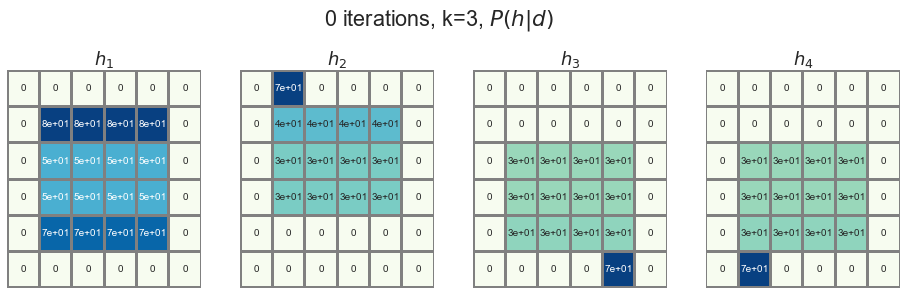

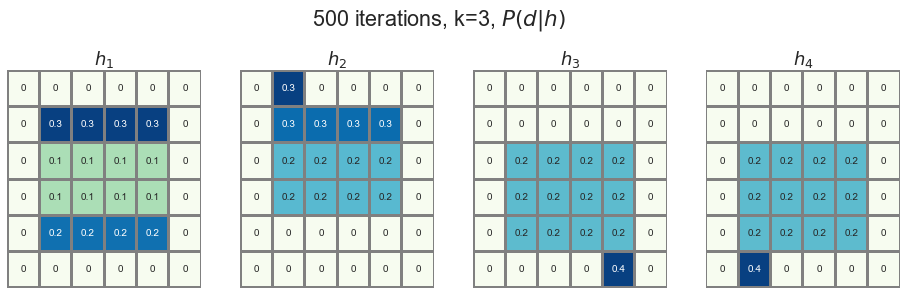

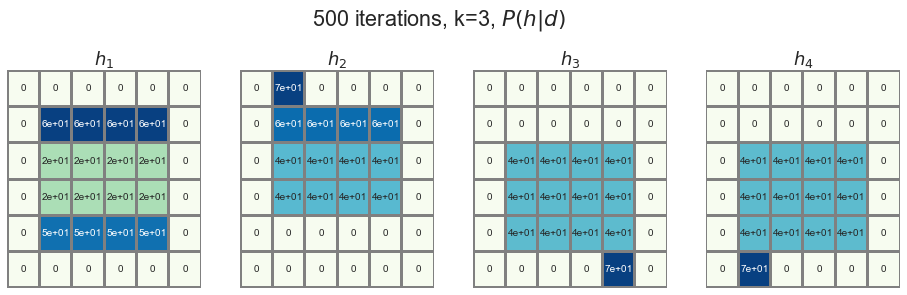

In [23]:
# Plot all problem 34 heatmaps

iters = [0, 500]
k_values = [1, 2, 3]
types = {'d': '$P(d|h)$', 'h': '$P(h|d)$'}

for k in k_values:
    for i in iters:
        for t, v in types.items(): 
            _ = make_and_plot_prob_heatmap(problem_34[i][k][t], f'{i} iterations, k={k}, {v}')


In [24]:
sort_values_ascending_by_column(problem_34[500][3]['h'], 'h_1').head(10)

h_1  h_2  h_3  h_4
i_1 i_2 i_3                    
8   19  25   1.0  0.0  0.0  0.0
    9   26   1.0  0.0  0.0  0.0
9   21  25   1.0  0.0  0.0  0.0
        26   1.0  0.0  0.0  0.0
        27   1.0  0.0  0.0  0.0
        28   1.0  0.0  0.0  0.0
8   9   28   1.0  0.0  0.0  0.0
        27   1.0  0.0  0.0  0.0
        25   1.0  0.0  0.0  0.0
10  19  25   1.0  0.0  0.0  0.0

In [25]:
sort_values_ascending_by_column(problem_34[0][3]['h'], 'h_1').head(10)

h_1  h_2  h_3  h_4
i_1 i_2 i_3                    
8   19  25   1.0  0.0  0.0  0.0
    9   26   1.0  0.0  0.0  0.0
9   21  25   1.0  0.0  0.0  0.0
        26   1.0  0.0  0.0  0.0
        27   1.0  0.0  0.0  0.0
        28   1.0  0.0  0.0  0.0
8   9   28   1.0  0.0  0.0  0.0
        27   1.0  0.0  0.0  0.0
        25   1.0  0.0  0.0  0.0
10  19  25   1.0  0.0  0.0  0.0

## Pragmatic example

In [26]:
problem_34[500][3]['h'].loc[(8,19,25), :]

h_1    1.0
h_2    0.0
h_3    0.0
h_4    0.0
Name: (8, 19, 25), dtype: float64

In [27]:
problem_34[500][2]['h'].loc[(8,19), :]

h_1    0.403707
h_2    0.596293
h_3    0.000000
h_4    0.000000
Name: (8, 19), dtype: float64

In [28]:
problem_34[500][1]['h'].loc[(8), :] # Somehow this is greater? 

h_1    0.49466
h_2    0.50534
h_3    0.00000
h_4    0.00000
Name: 8, dtype: float64

In [29]:
problem_34[500][1]['h'].loc[(19), :] 

h_1    0.211513
h_2    0.216080
h_3    0.286204
h_4    0.286204
Name: 19, dtype: float64

## Literal example

In [30]:
problem_34[0][3]['h'].loc[(8,19,25), :]

h_1    1.0
h_2    0.0
h_3    0.0
h_4    0.0
Name: (8, 19, 25), dtype: float64

In [31]:
problem_34[0][2]['h'].loc[(8,19), :]

h_1    0.5
h_2    0.5
h_3    0.0
h_4    0.0
Name: (8, 19), dtype: float64

In [32]:
problem_34[0][1]['h'].loc[(19), :] 

h_1    0.25
h_2    0.25
h_3    0.25
h_4    0.25
Name: 19, dtype: float64

## Example plots

In [63]:
def plot_probs(problem, exs, prob_num):

    plt.figure()

    p_h_0 = [problem[0][1]['h'].loc[exs[0], 'h_1'], 
            problem[0][2]['h'].loc[exs[1], 'h_1'], 
            problem[0][3]['h'].loc[exs[2], 'h_1']]

    p_h_500 = [problem[500][1]['h'].loc[exs[0], 'h_1'], 
            problem[500][2]['h'].loc[exs[1], 'h_1'], 
            problem[500][3]['h'].loc[exs[2], 'h_1']]

    n_ex = range(1,4)
    plt.plot(n_ex, p_h_0, label='Literal learner')
    plt.plot(n_ex, p_h_500, label='Pragmatic learner')

    plt.title(f'Problem {prob_num}, learner\'s belief in $h_1$')
    plt.xlabel('Examples')
    plt.ylabel('$P(h_1|d)$')
    plt.xticks(n_ex, exs)
    plt.ylim((0, 1))
    plt.legend()

    plt.show()

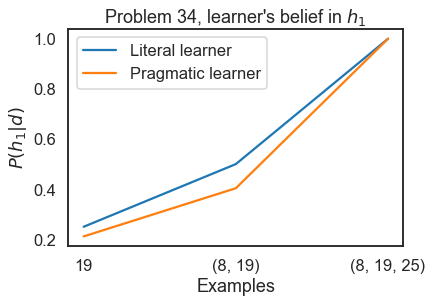

In [34]:
exs = [(19), (8, 19), (8, 19, 25)]

plot_probs(problem_34, exs, 34)

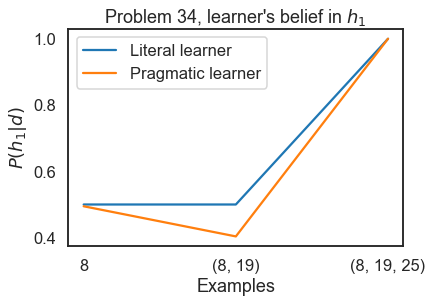

In [35]:
exs = [(8), (8, 19), (8, 19, 25)]
plot_probs(problem_34, exs, 34)

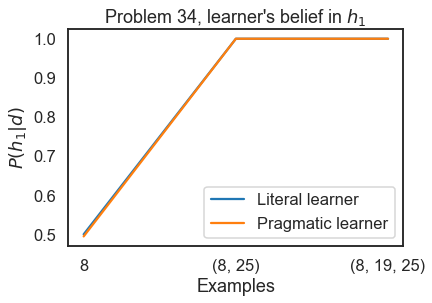

In [36]:
exs = [(8), (8, 25), (8, 19, 25)]
plot_probs(problem_34, exs, 34)

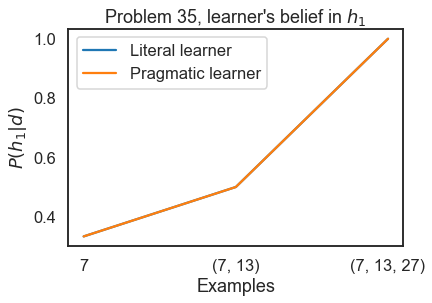

In [37]:
exs = [(7), (7, 13), (7, 13, 27)]
plot_probs(problem_35, exs, 35)

## Trying problem 46

In [38]:
problem_46 = {}
problem_46[0] = find_teacher_probs(0, 46, all_problems)  # 0 iterations
problem_46[500] = find_teacher_probs(500, 46, all_problems)  # 500 iterations

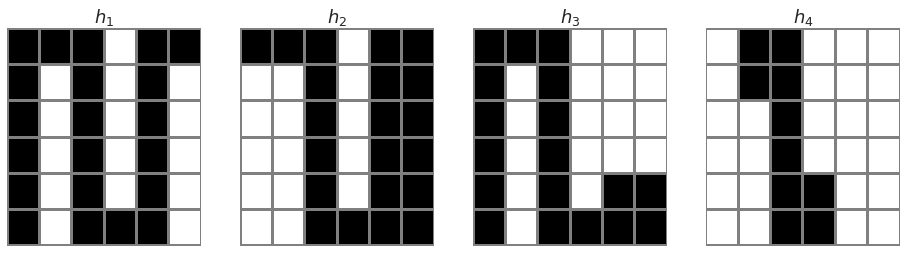

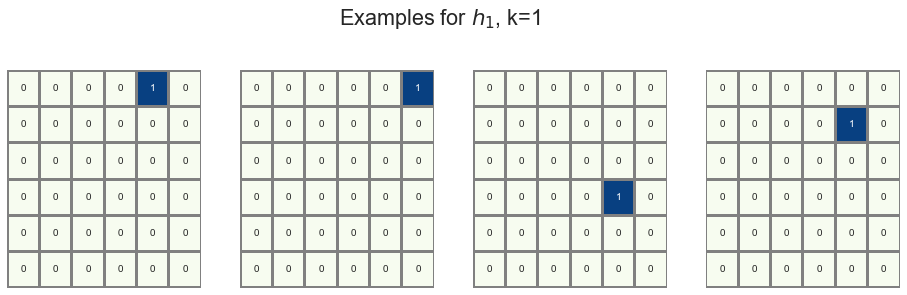

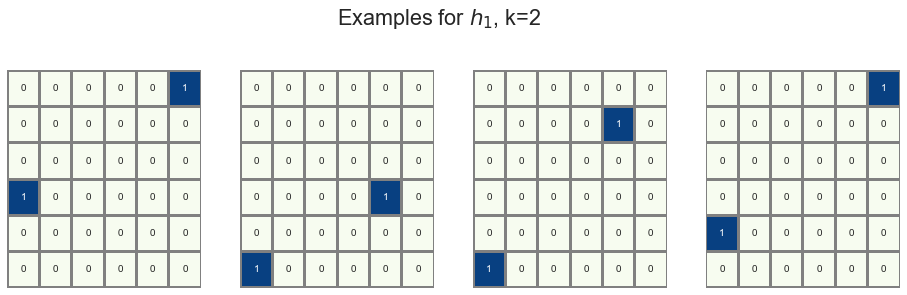

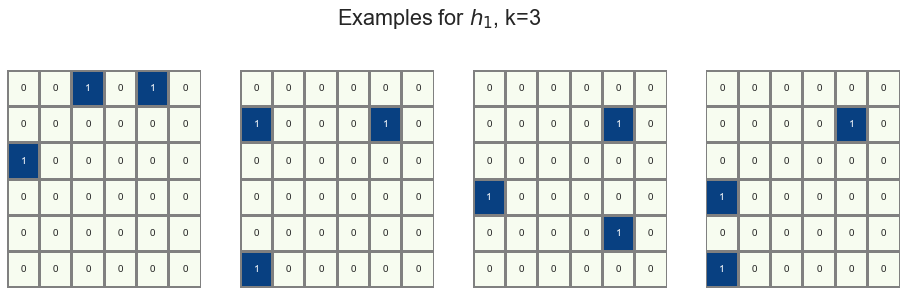

In [39]:
plot_high_prob_examples(problem_46, 500, 'd', 46, all_problems)

In [40]:
sort_values_ascending_by_column(problem_46[500][3]['h'], 'h_1').head(10)

h_1  h_2  h_3  h_4
i_1 i_2 i_3                    
2   4   12   1.0  0.0  0.0  0.0
6   10  30   1.0  0.0  0.0  0.0
10  18  28   1.0  0.0  0.0  0.0
        30   1.0  0.0  0.0  0.0
        32   1.0  0.0  0.0  0.0
        33   1.0  0.0  0.0  0.0
        34   1.0  0.0  0.0  0.0
6   10  34   1.0  0.0  0.0  0.0
        33   1.0  0.0  0.0  0.0
        32   1.0  0.0  0.0  0.0

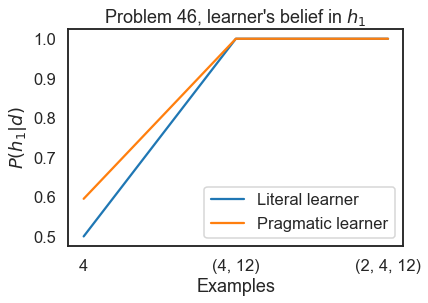

In [41]:
exs = [(4), (4, 12), (2, 4, 12)]
plot_probs(problem_46, exs, 46)

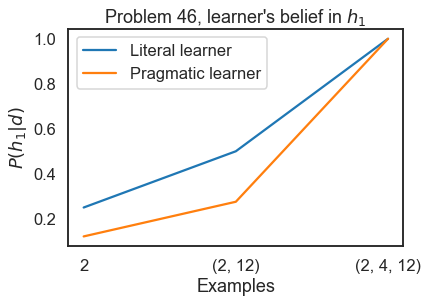

In [42]:
exs = [(2), (2, 12), (2, 4, 12)]
plot_probs(problem_46, exs, 46)

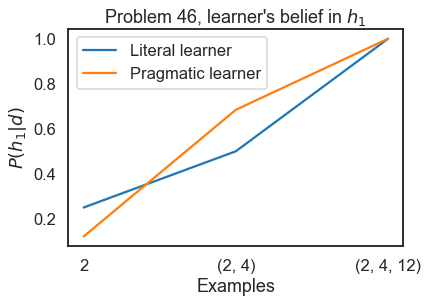

In [43]:
exs = [(2), (2, 4), (2, 4, 12)]
plot_probs(problem_46, exs, 46)

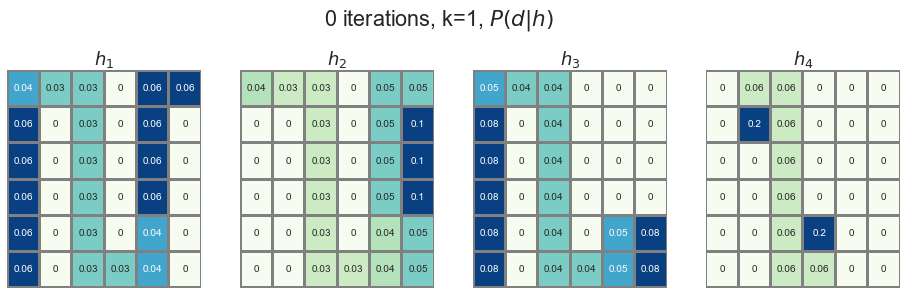

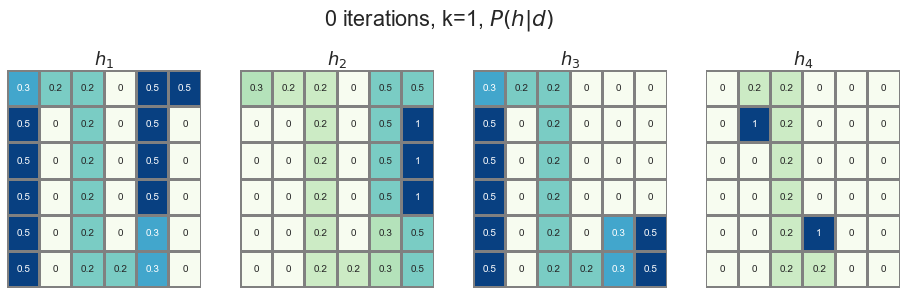

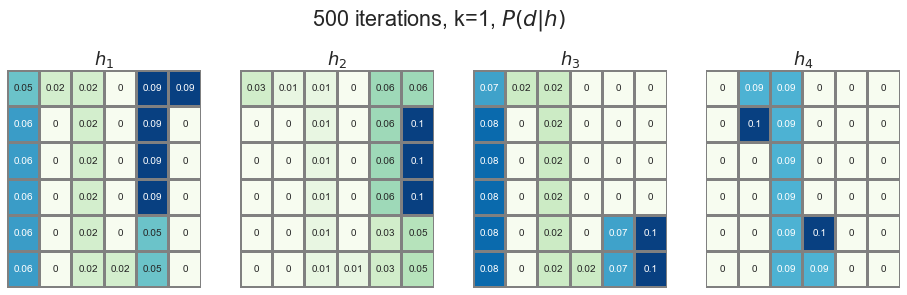

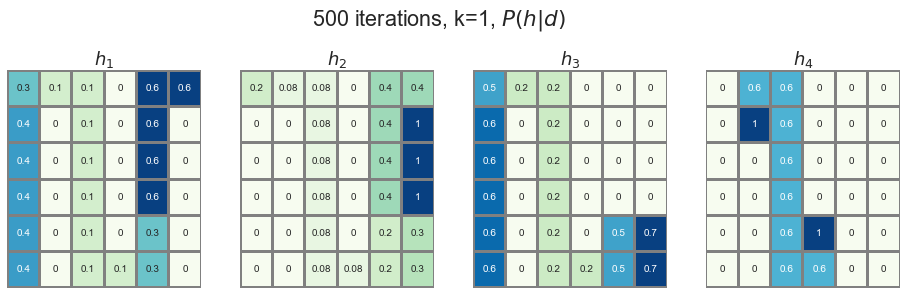

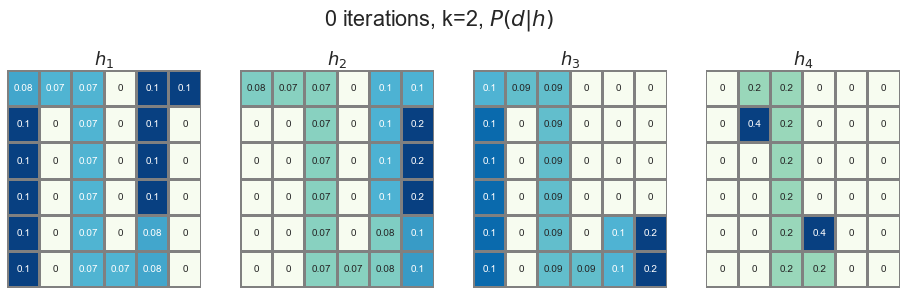

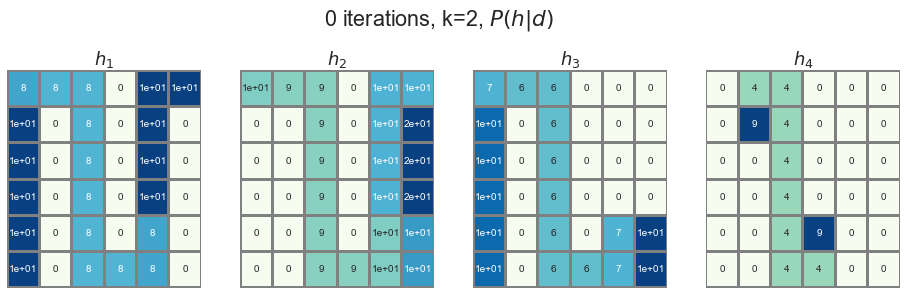

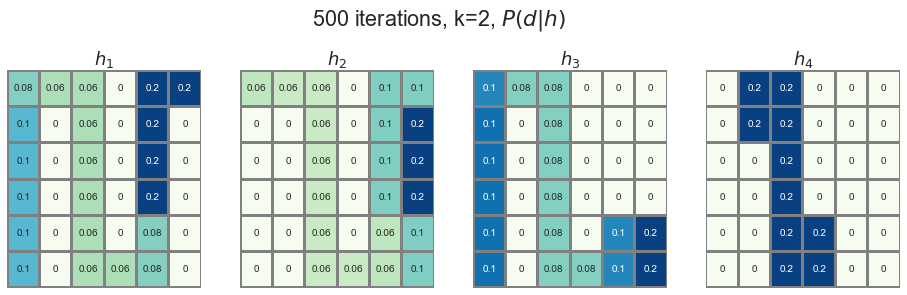

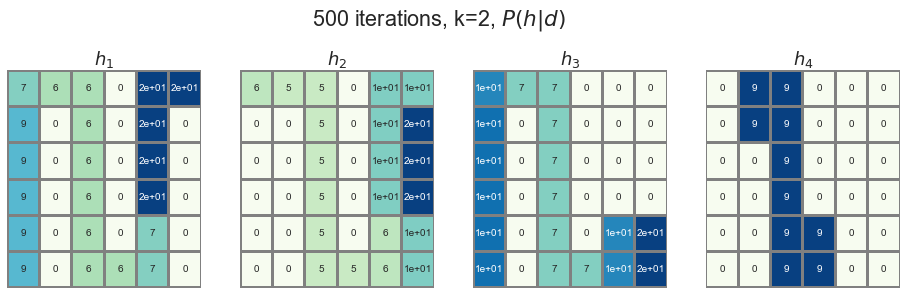

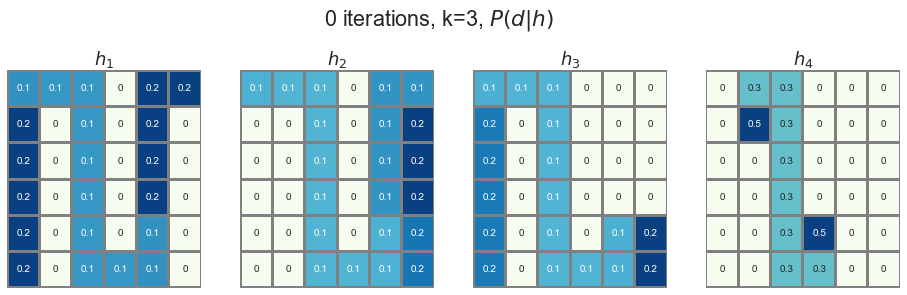

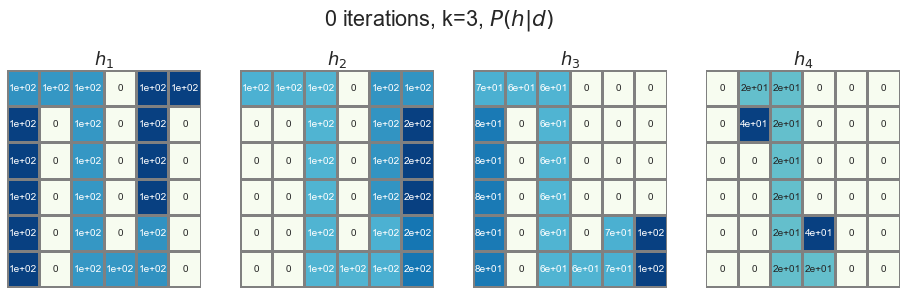

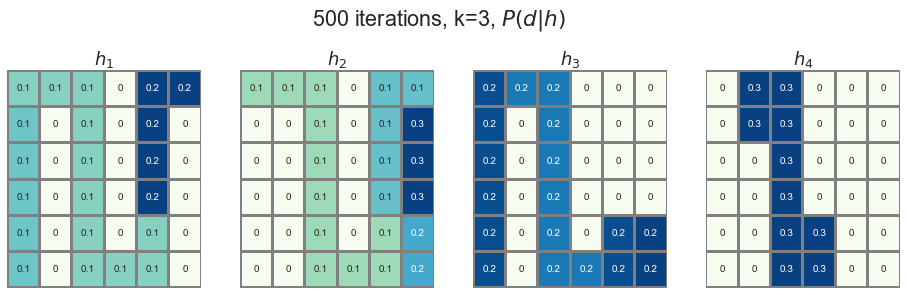

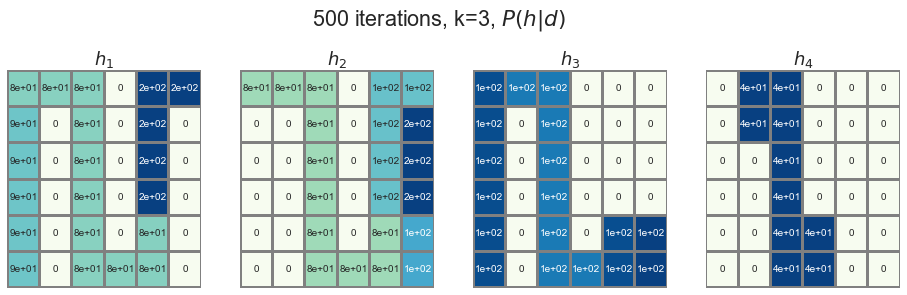

In [44]:
# Plot problem 46 heatmaps


iters = [0, 500]
k_values = [1, 2, 3]
types = {'d': '$P(d|h)$', 'h': '$P(h|d)$'}

for k in k_values:
    for i in iters:
        for t, v in types.items(): 
            _ = make_and_plot_prob_heatmap(problem_46[i][k][t], f'{i} iterations, k={k}, {v}')

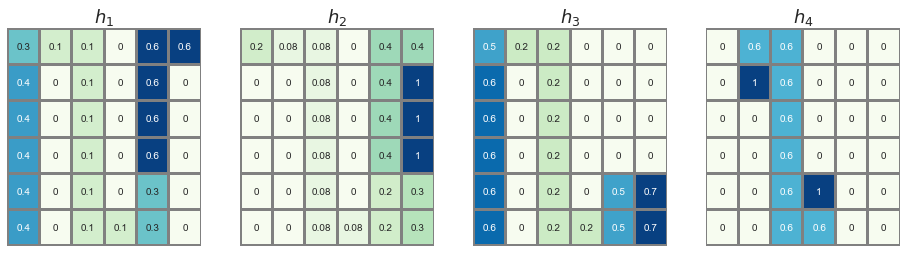

In [45]:
_ = make_and_plot_prob_heatmap(problem_46[500][1]['h'], '')

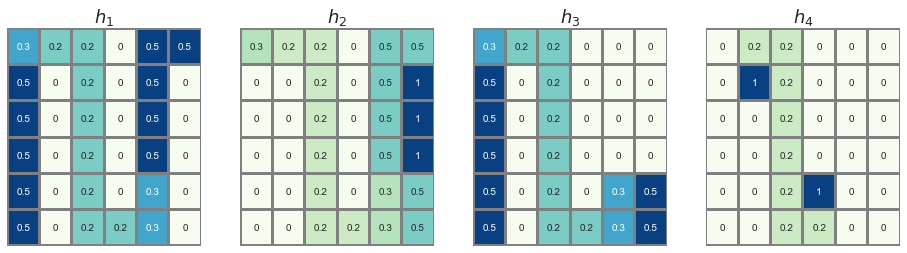

In [46]:
_ = make_and_plot_prob_heatmap(problem_46[0][1]['h'], '')

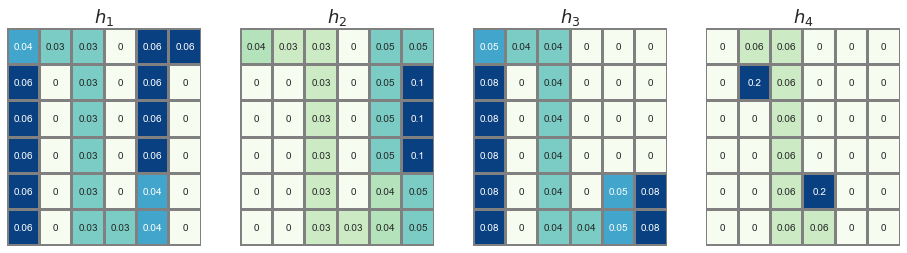

In [47]:
_ = make_and_plot_prob_heatmap(problem_46[0][1]['d'], '')

- doesn't seem to be that big of a difference between literal and pragmatic learner
- would it be helpful to plot probabilities of specific points over iterations? 


## Plot entropy

In [48]:
from scipy import stats

In [49]:
def plot_entropy(df_1, df_2):

    mtx_1 = df_1.to_numpy()
    mtx_2 = df_2.to_numpy()

    posterior_mtx = np.stack([mtx_1, mtx_2],axis=-1)

    # Compute entropy
    entropy_mtx = stats.entropy(posterior_mtx)

    # Assemble into a tidy datframe
    entropy_df = pd.DataFrame(entropy_mtx, 
                              index=['h_%i' % (i+1) for i in range(4)],
                              columns=['0', '500'])

    entropy_df.index.name = 'hypothesis' # Hypothesis column
    entropy_df = entropy_df.reset_index()

    entropy_df = pd.melt(entropy_df, id_vars=['hypothesis'], value_vars=['0','500'],
                         var_name='iterations', value_name='entropy')

    ax = sns.relplot(data=entropy_df, x='iterations', y='entropy', col='hypothesis', kind='line')
    ax.set(xlabel='Iterations', ylabel='Entropy: $H(h|d)$')

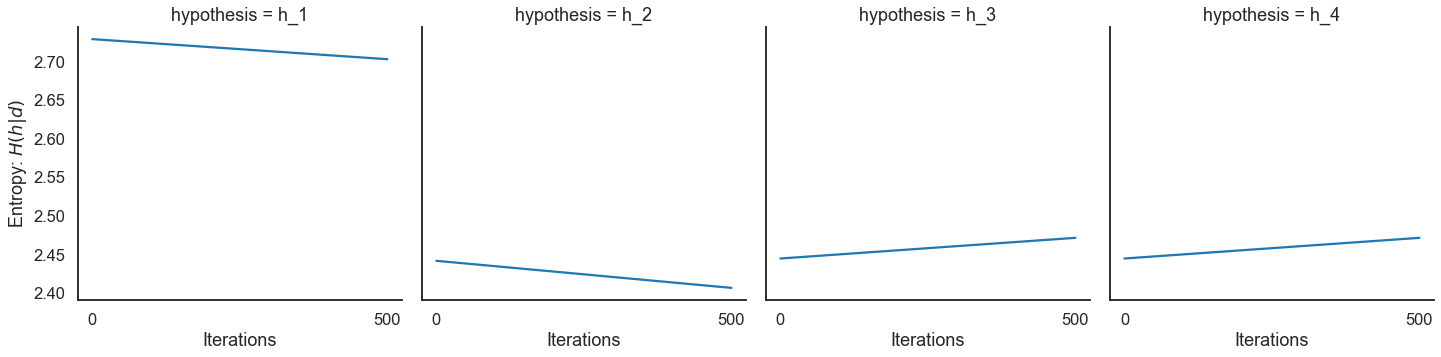

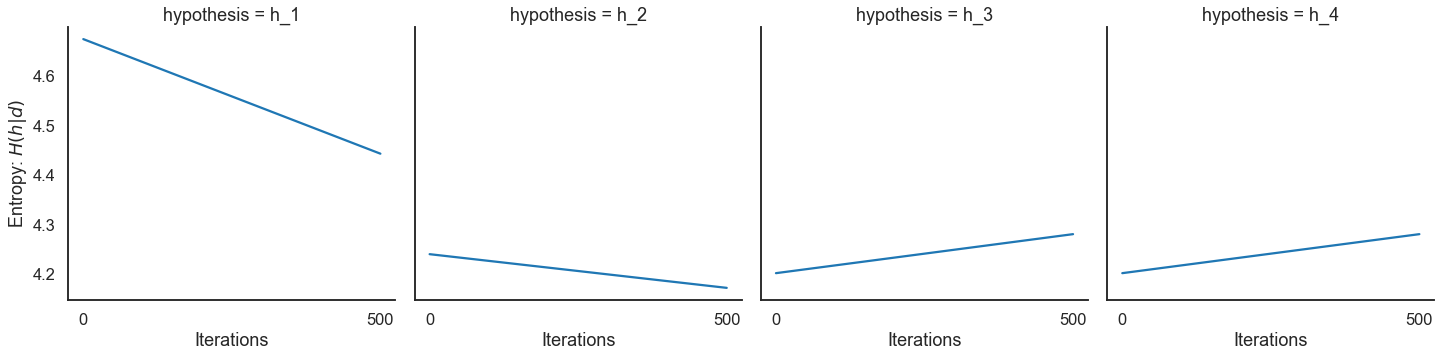

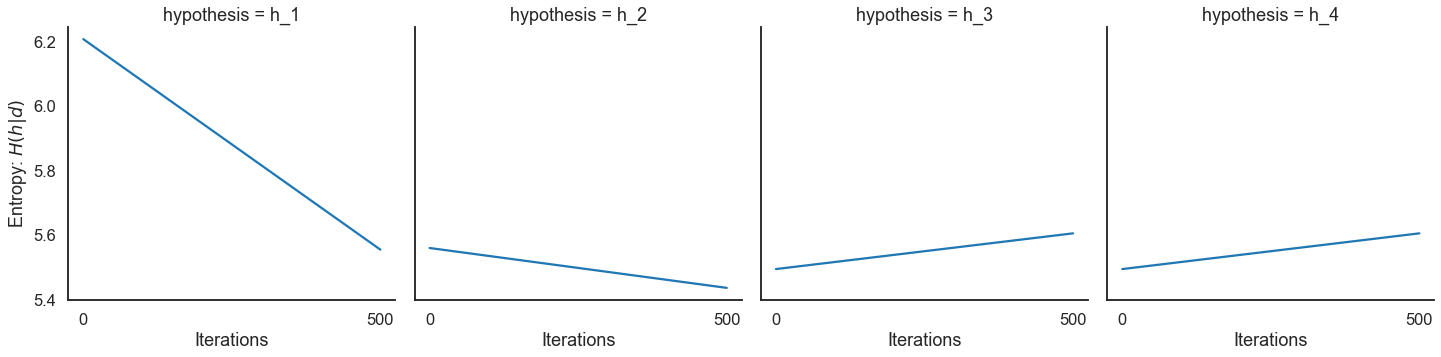

In [50]:
for i in range(1, 4):
    plot_entropy(problem_34[0][i]['h'], problem_34[500][i]['h'])

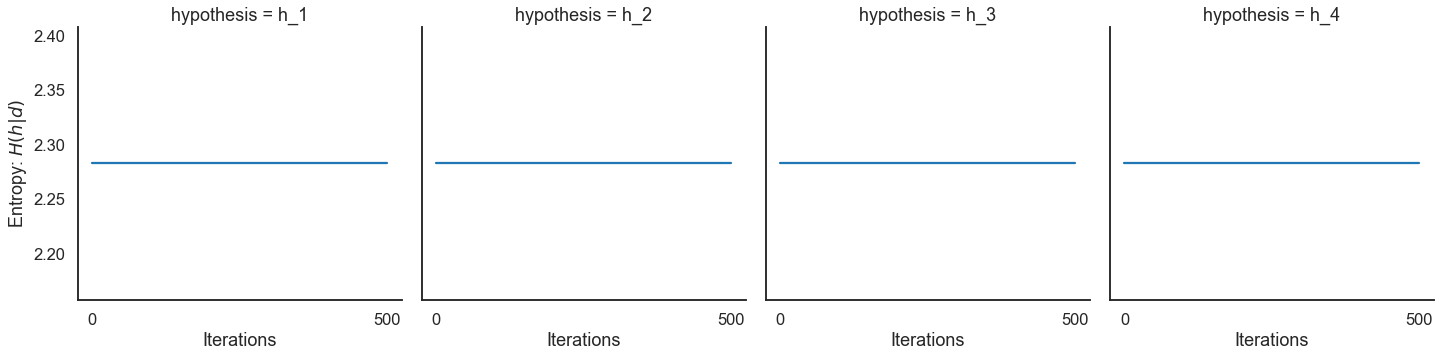

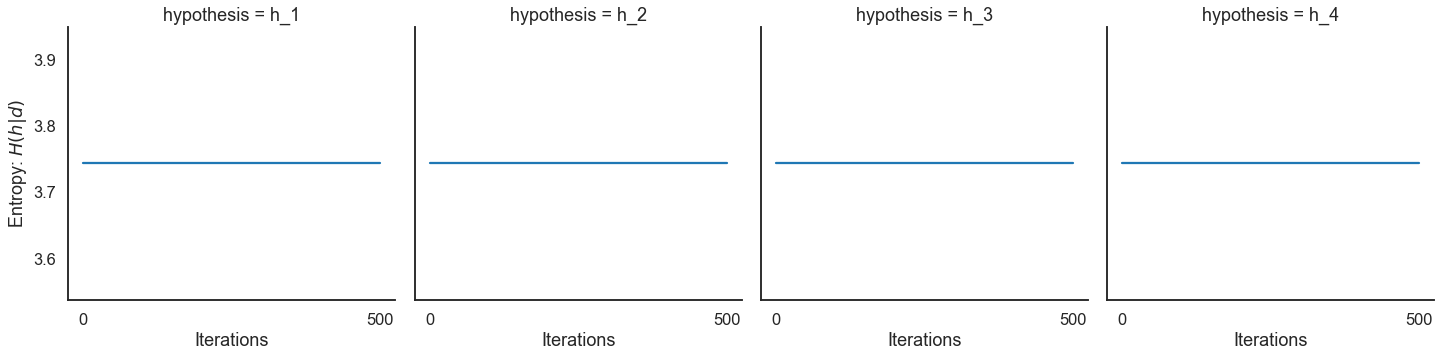

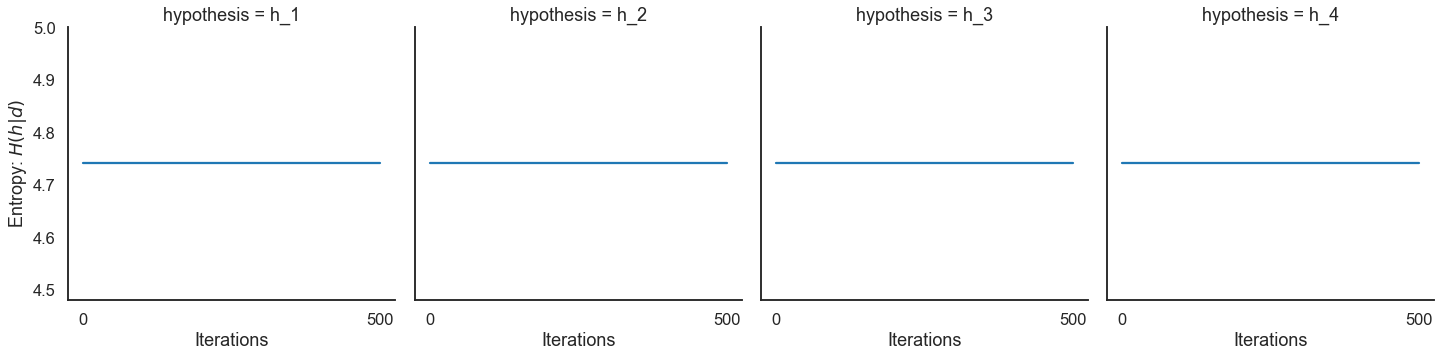

In [51]:
for i in range(1, 4):
    plot_entropy(problem_35[0][i]['h'], problem_35[500][i]['h'])

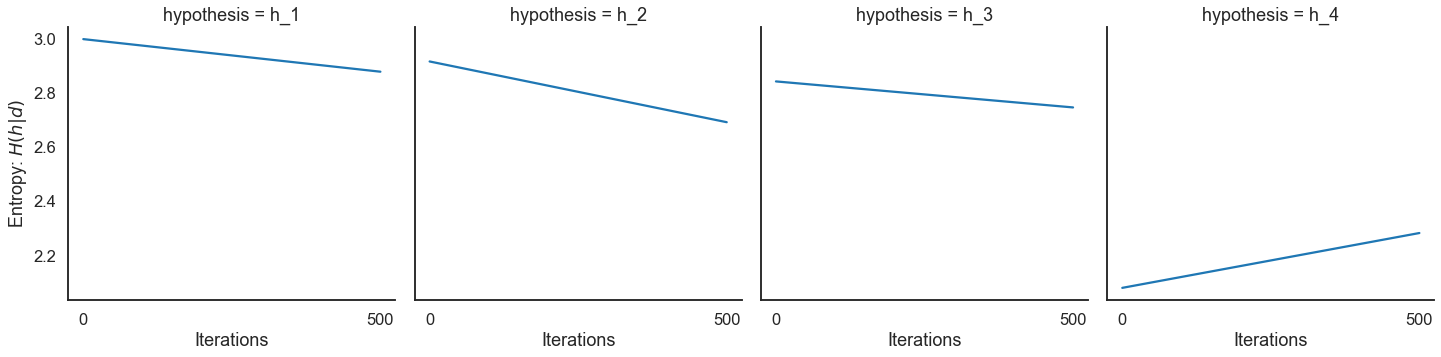

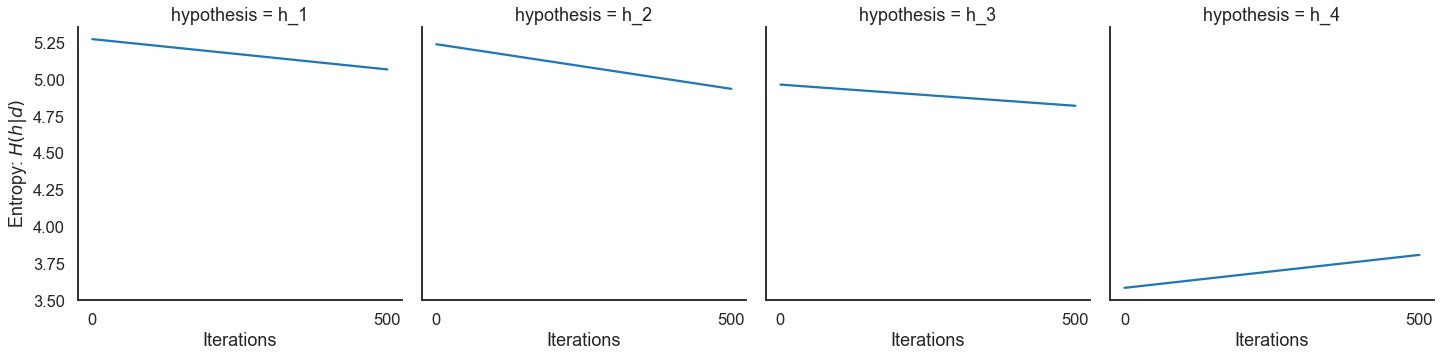

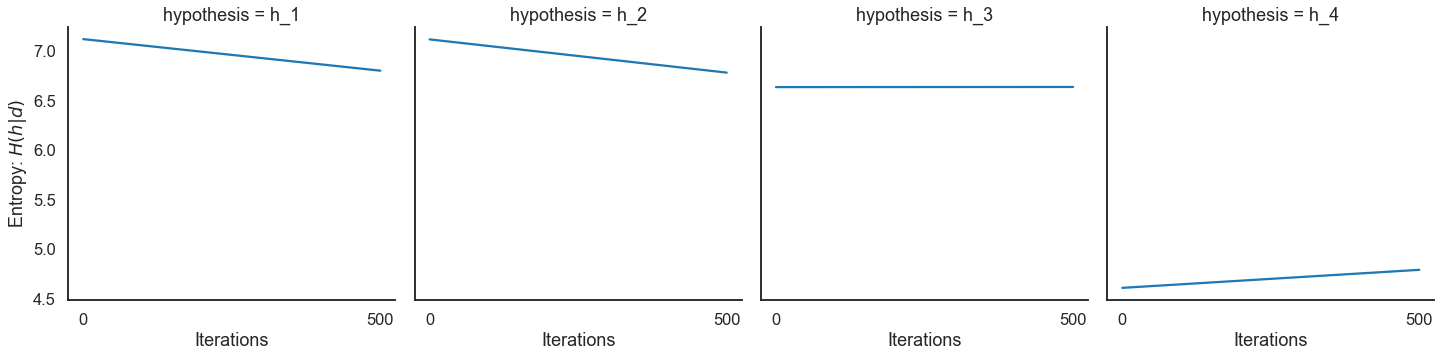

In [52]:
for i in range(1, 4):
    plot_entropy(problem_46[0][i]['h'], problem_46[500][i]['h'])

## Problem 49

In [53]:
problem_49 = {}

problem_49[0] = find_teacher_probs(0, 49, all_problems)  # 0 iterations
problem_49[500] = find_teacher_probs(500, 49, all_problems)  

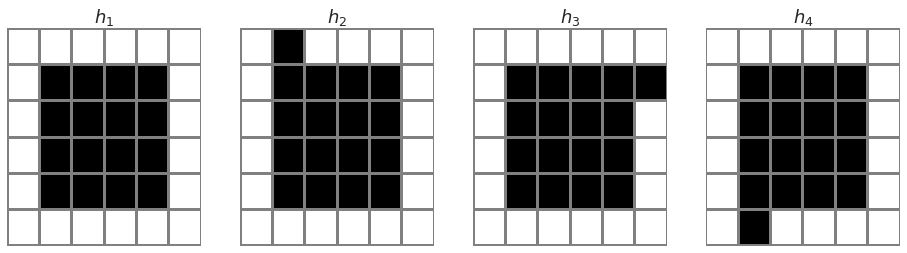

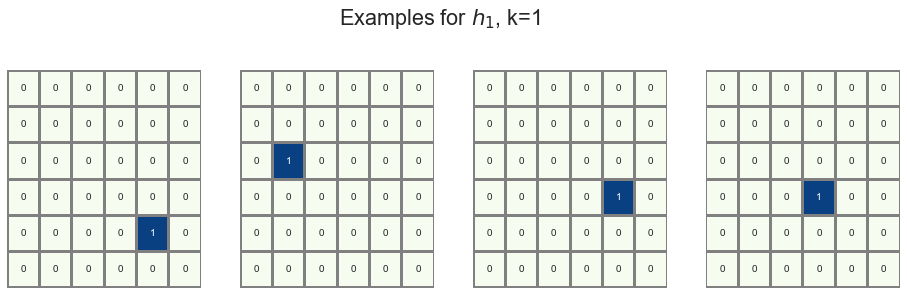

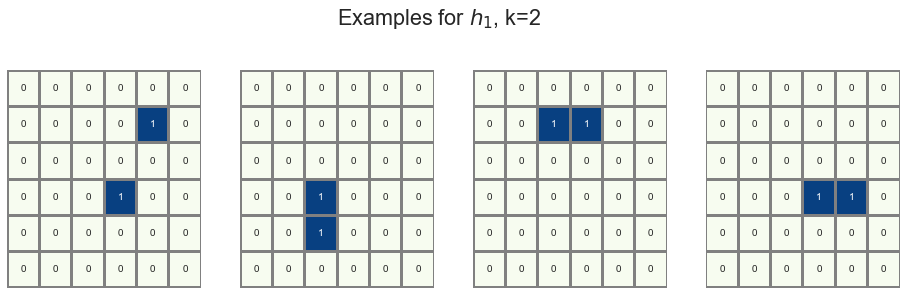

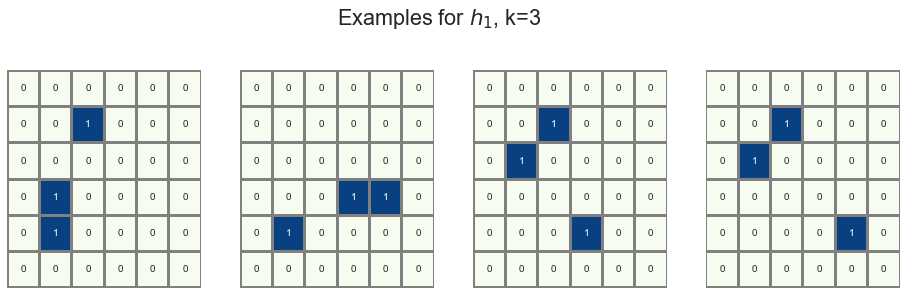

In [54]:
plot_high_prob_examples(problem_49, 500, 'd', 49, all_problems)

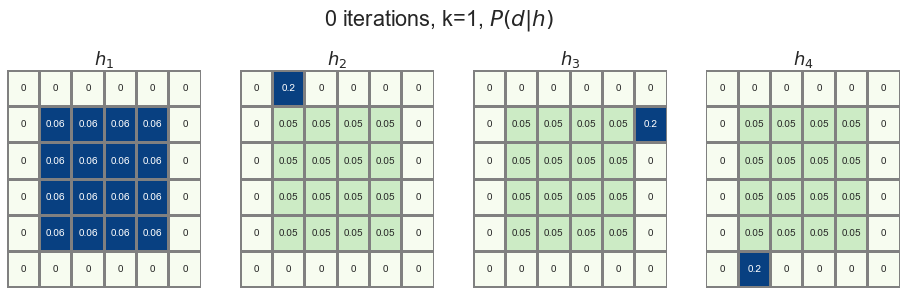

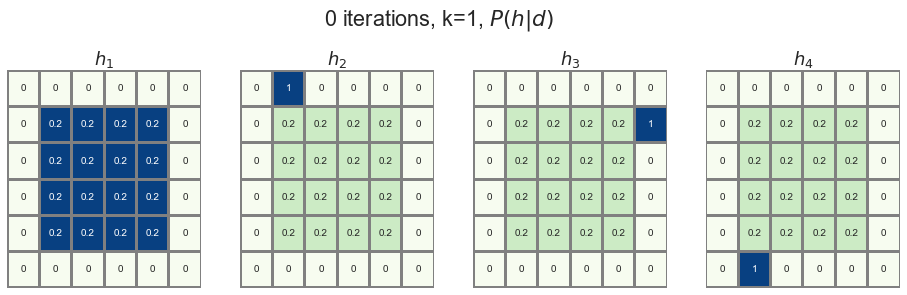

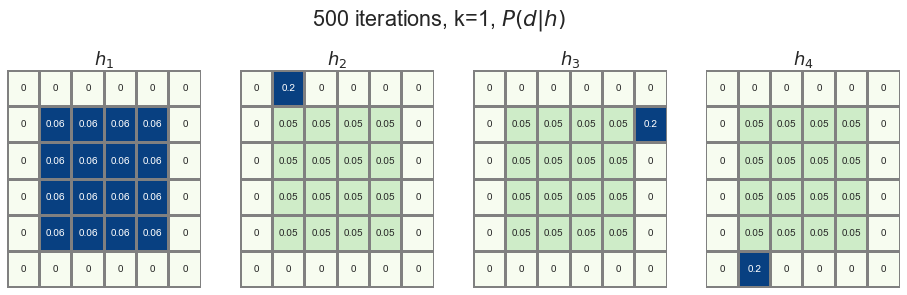

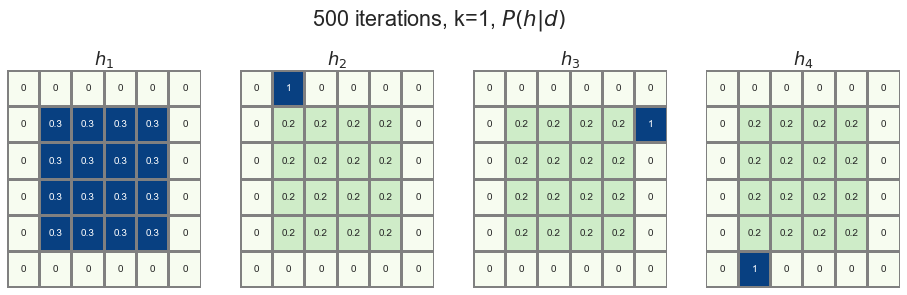

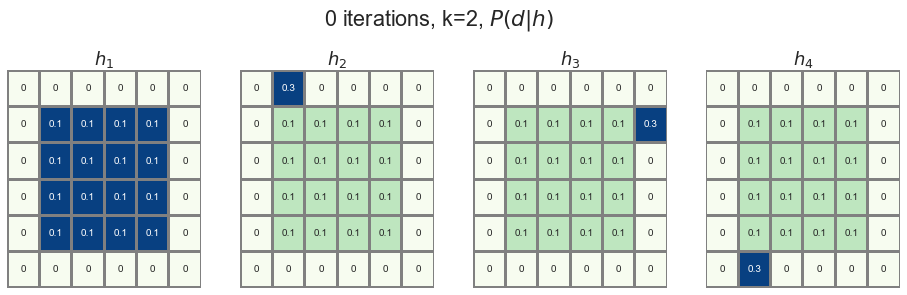

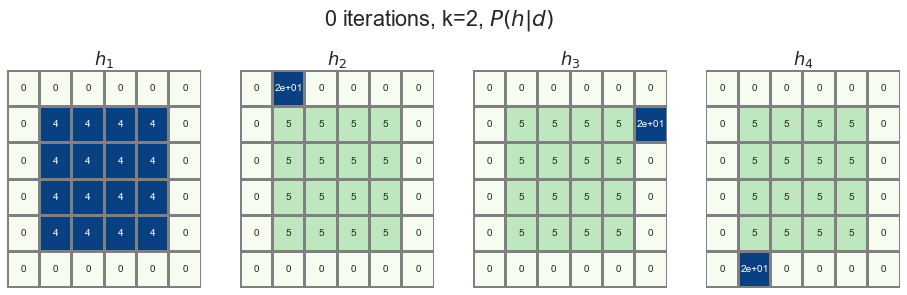

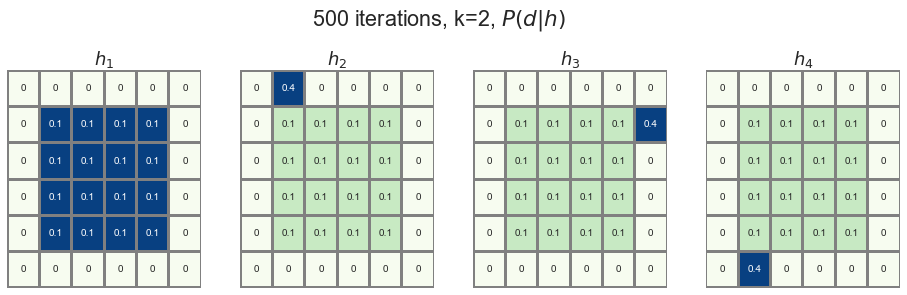

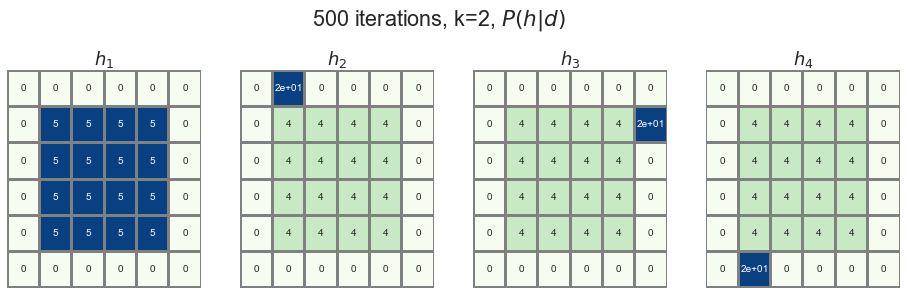

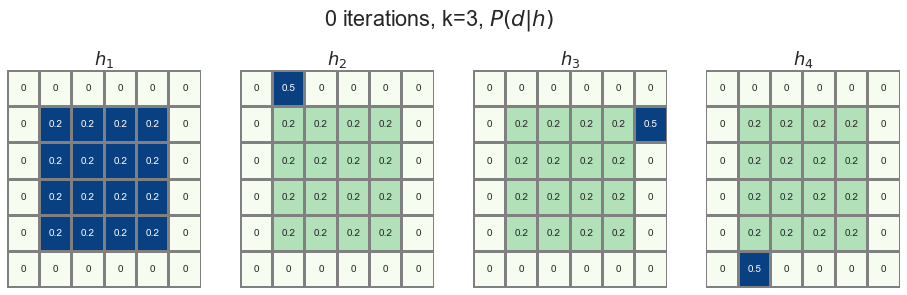

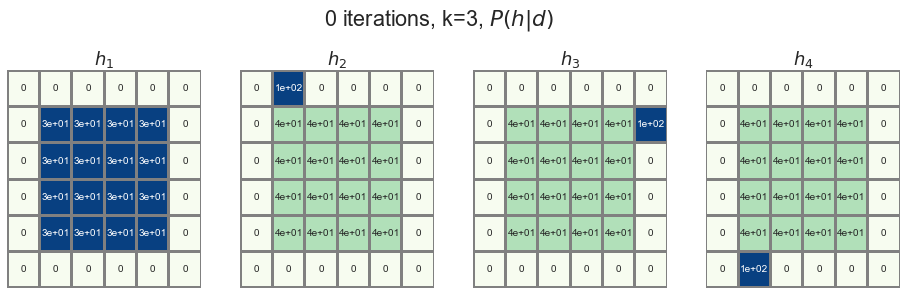

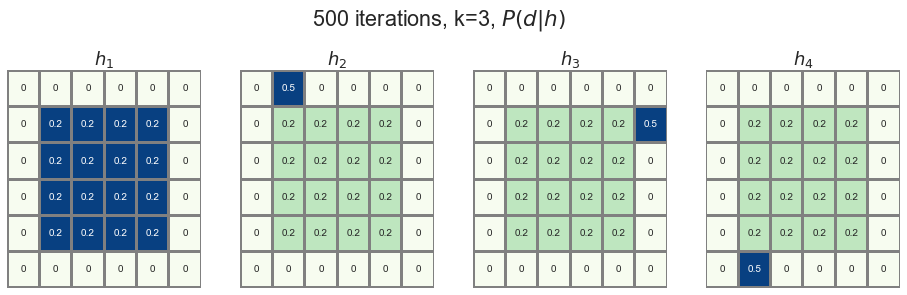

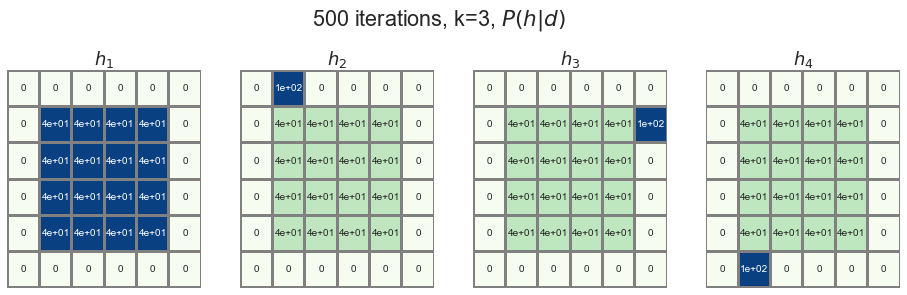

In [55]:
iters = [0, 500]
k_values = [1, 2, 3]
types = {'d': '$P(d|h)$', 'h': '$P(h|d)$'}

for k in k_values:
    for i in iters:
        for t, v in types.items(): 
            _ = make_and_plot_prob_heatmap(problem_49[i][k][t], f'{i} iterations, k={k}, {v}')

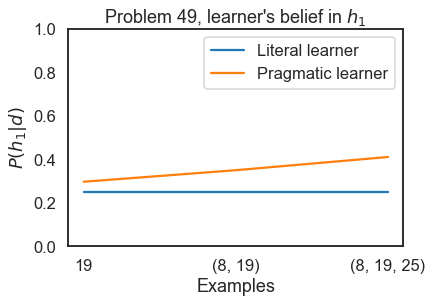

In [64]:
exs = [(19), (8, 19), (8, 19, 25)]
plot_probs(problem_49, exs, 49)

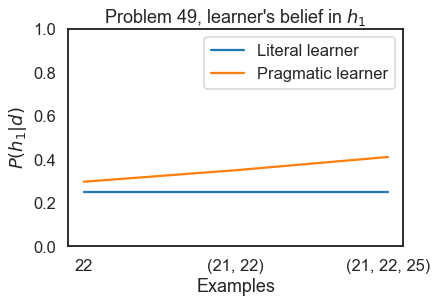

In [67]:
exs = [(22), (21, 22), (21, 22, 25)]
plot_probs(problem_49, exs, 49)

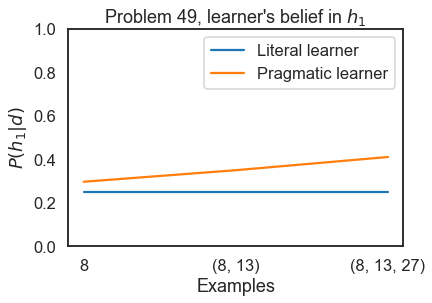

In [68]:
exs = [(8), (8, 13), (8, 13, 27)]
plot_probs(problem_49, exs, 49)